### Develop LSTM Models For Univariate Time Series Forecasting

In [37]:

# univariate lstm example
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [38]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [54]:
dataset_name = "q1"
product_name = "no2"
file_path = 'dataset/'+dataset_name+'.csv'
data = pd.read_csv(file_path)
print(data.tail(8))

tmp = np.array(data[product_name])

# Normalization: Chuan hoa du lieu => [0,1]
print('===> Min max scaling')
from sklearn import preprocessing as pp
mms = pp.MinMaxScaler()
data_mms = mms.fit_transform(tmp.reshape(-1,1))
print("===> mms\n", data_mms, "\nmin: ",data_mms.min(),"\nmean: ",data_mms.mean(),"\nmax: ",data_mms.max(),)

            date dist        co  no2        o3       so2  ch4      hcho
1191  2021-08-03   q1  0.027522  0.0  0.122755  0.000513    0  0.000257
1192  2021-08-04   q1  0.025587  0.0  0.124452  0.000000    0  0.000000
1193  2021-08-05   q1  0.028541  0.0  0.124218  0.000000    0  0.000000
1194  2021-08-06   q1  0.000000  0.0  0.120559  0.000000    0  0.000000
1195  2021-08-07   q1  0.020865  0.0  0.119257  0.000000    0  0.000000
1196  2021-08-08   q1  0.025278  0.0  0.118261  0.000000    0  0.000000
1197  2021-08-09   q1  0.000000  0.0  0.120582  0.000000    0  0.000295
1198  2021-08-10   q1  0.026092  0.0  0.120392  0.000000    0  0.000000
===> Min max scaling
===> mms
 [[0.30101245]
 [0.27129156]
 [0.25983075]
 ...
 [0.        ]
 [0.        ]
 [0.        ]] 
min:  0.0 
mean:  0.09577134086237415 
max:  1.0


In [40]:
# define input sequence
#timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
timeseries_data = data_mms
print(timeseries_data)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

[[0.30101245]
 [0.27129156]
 [0.25983075]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


In [41]:
print(X),print(y)

[[[0.30101245]
  [0.27129156]
  [0.25983075]]

 [[0.27129156]
  [0.25983075]
  [0.        ]]

 [[0.25983075]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]]]
[[0.        ]
 [0.        ]
 [0.47224881]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


(None, None)

In [42]:
X.shape

(1196, 3, 1)

In [43]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [44]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


Epoch 1/300
38/38 [==============================] - 2s 4ms/step - loss: 0.0385
Epoch 2/300
38/38 [==============================] - 0s 4ms/step - loss: 0.0360
Epoch 3/300
38/38 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 4/300
38/38 [==============================] - 0s 4ms/step - loss: 0.0357
Epoch 5/300
38/38 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 6/300
38/38 [==============================] - 0s 5ms/step - loss: 0.0356
Epoch 7/300
38/38 [==============================] - 0s 5ms/step - loss: 0.0354
Epoch 8/300
38/38 [==============================] - 0s 5ms/step - loss: 0.0355
Epoch 9/300
38/38 [==============================] - 0s 5ms/step - loss: 0.0353
Epoch 10/300
38/38 [==============================] - 0s 4ms/step - loss: 0.0355
Epoch 11/300
38/38 [==============================] - 0s 4ms/step - loss: 0.0354
Epoch 12/300
38/38 [==============================] - 0s 4ms/step - loss: 0.0353
Epoch 13/300
38/38 [=================

### Predicting For the next 10 data

In [56]:
# demonstrate prediction for next 10 days
x_input = np.array([0.0, 0.0, 0.0])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.06660733]
1 day input [0.         0.         0.06660733]
1 day output [[0.06761594]]
2 day input [0.         0.06660733 0.06761594]
2 day output [[0.06764034]]
3 day input [0.06660733 0.06761594 0.06764034]
3 day output [[0.07240346]]
4 day input [0.06761594 0.06764034 0.07240346]
4 day output [[0.07258154]]
5 day input [0.06764034 0.07240346 0.07258154]
5 day output [[0.07258689]]
6 day input [0.07240346 0.07258154 0.07258689]
6 day output [[0.07306876]]
7 day input [0.07258154 0.07258689 0.07306876]
7 day output [[0.07309476]]
8 day input [0.07258689 0.07306876 0.07309476]
8 day output [[0.07309555]]
9 day input [0.07306876 0.07309476 0.07309555]
9 day output [[0.07314467]]
[0.066607326, 0.06761594, 0.06764034, 0.07240346, 0.07258154, 0.07258689, 0.07306876, 0.073094755, 0.073095545, 0.073144674]


In [57]:
timeseries_data

array([[0.30101245],
       [0.27129156],
       [0.25983075],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [58]:
len(timeseries_data)

1199

In [48]:
lst_output

[-828.3983,
 -320.70245,
 -214.61783,
 -19.016754,
 -6.2733407,
 -0.1732224,
 0.28148425,
 0.1405233,
 0.099877134,
 0.11149557]

In [60]:
lst_output

[0.066607326,
 0.06761594,
 0.06764034,
 0.07240346,
 0.07258154,
 0.07258689,
 0.07306876,
 0.073094755,
 0.073095545,
 0.073144674]

### Visualizaing The Output

In [50]:
import matplotlib.pyplot as plt

In [84]:
day_new=np.arange(1,1200)
day_pred=np.arange(1200,1210)
print(len(day_new), len(day_pred))

1199 10


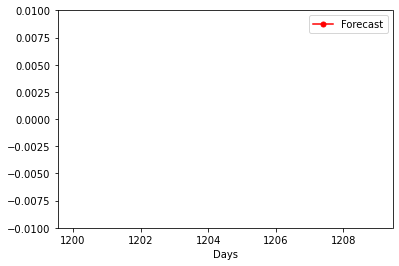

In [87]:
#plt.plot(day_new,timeseries_data, "bs-", markersize=5, label="Actual")
plt.plot(day_pred,lst_output, "ro-", markersize=5, label="Forecast")
plt.legend(loc="best")
plt.xlabel("Days")
plt.ylim([-0.1,0.1])
plt.show()
